<a href="https://colab.research.google.com/github/sanuli2008/Comparing-Tesla-and-GameStop-Stock-Prices-vs-Revenue-Analysis/blob/main/2425615.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Creating a github repo for this project**



**1. Import dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  #to encode categorical variables and features
from imblearn.over_sampling import SMOTE        #to solve class imbalance in target variable
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle   #to save files

**2. Data loading and understanding**

In [ ]:
path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
pd.set_option("display.max_columns",None)    #to display all the columns
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print(df.isnull().sum)

<bound method DataFrame.sum of       customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0          False   False          False    False       False   False   
1          False   False          False    False       False   False   
2          False   False          False    False       False   False   
3          False   False          False    False       False   False   
4          False   False          False    False       False   False   
...          ...     ...            ...      ...         ...     ...   
7038       False   False          False    False       False   False   
7039       False   False          False    False       False   False   
7040       False   False          False    False       False   False   
7041       False   False          False    False       False   False   
7042       False   False          False    False       False   False   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  \
0            False          False 

In [ ]:
#displaying unique values from all the columns
for col in df.columns:
  print(col, df[col].unique())
  print("-"*50)

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSec

In [ ]:
#replacing empty values with a number in string format
df['TotalCharges'] = df["TotalCharges"].replace({" ":" 0.0"})

In [ ]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#dropping customerId since it is not required for modelling
df = df.drop(columns=["customerID"])

In [ ]:
#checking the class distribution of target column
print(df["Churn"].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


**3. Exploratory Data Analysis(EDA)**

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


3.1. Numerical feature analysis

3.1.1. Understanding the distribution of the numerical features

In [ ]:
def plot_histogram(df,column_name):
  plt.figure(figsize=(5,3))
  sns.histplot(df[column_name],kde=True)
  plt.title(f"Distribution of {column_name}")
  #calculatethe mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  #add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle = "--", label = "Mean")
  plt.axvline(col_median, color="green", linestyle = "--", label = "Median")

  plt.legend()
  plt.show()

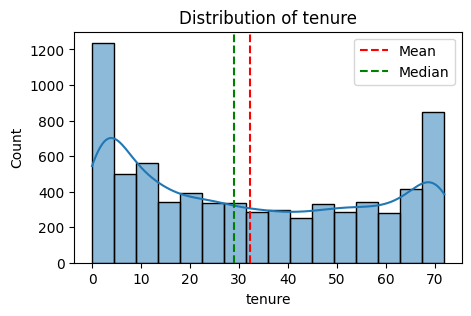

In [ ]:
plot_histogram(df,"tenure")

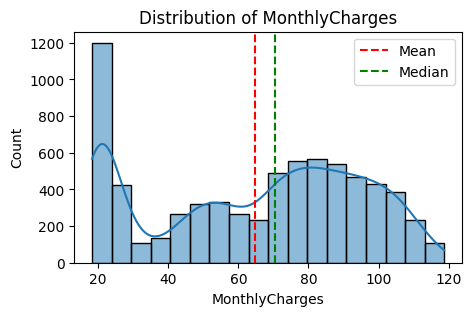

In [ ]:
plot_histogram(df,"MonthlyCharges")

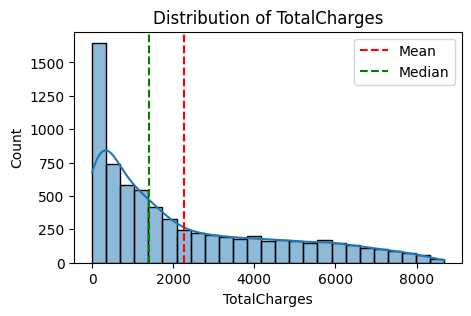

In [ ]:
plot_histogram(df,"TotalCharges")

Box plot for numerical features

In [ ]:
def plot_boxplot(df, column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show()

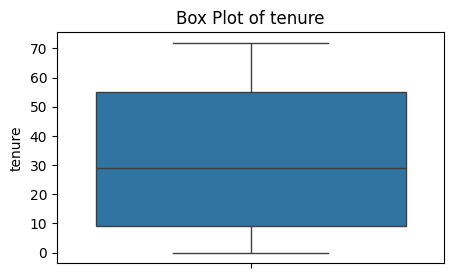

In [ ]:
plot_boxplot(df,"tenure")

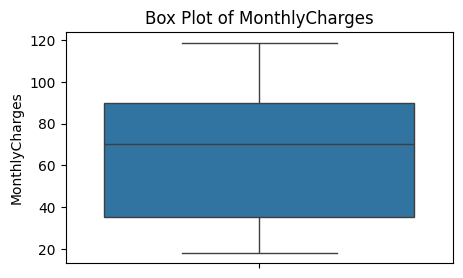

In [ ]:
plot_boxplot(df,"MonthlyCharges")

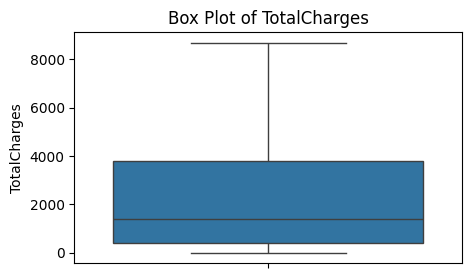

In [ ]:
plot_boxplot(df,"TotalCharges")

**Correlation of numerical fetures**

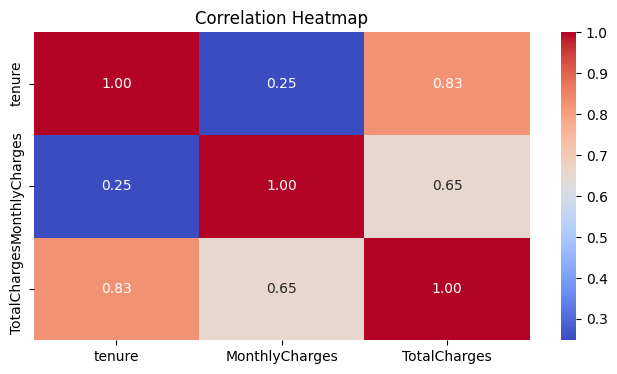

In [ ]:
#correlation matrix - heatmap
plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Categorical features - Analysis**

In [ ]:
#all the categorical features
object_cols = df.select_dtypes(include="object").columns.to_list()
object_cols = ["SeniorCitizen"] + object_cols
print(object_cols)

['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


Countplot for categorical columns

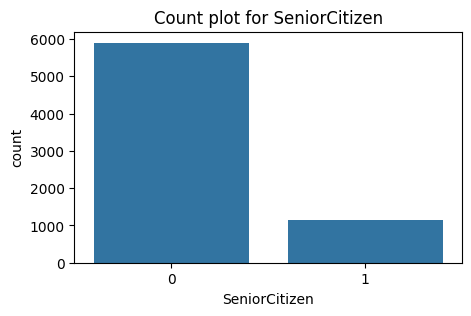

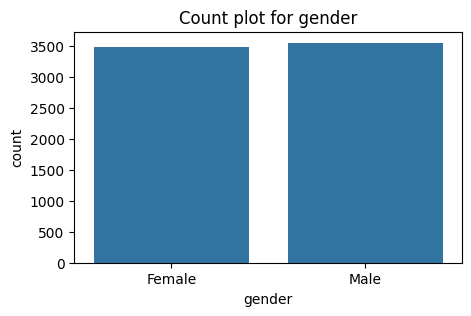

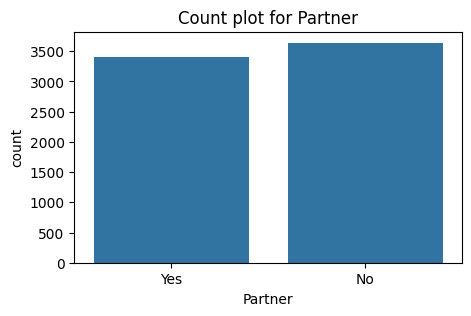

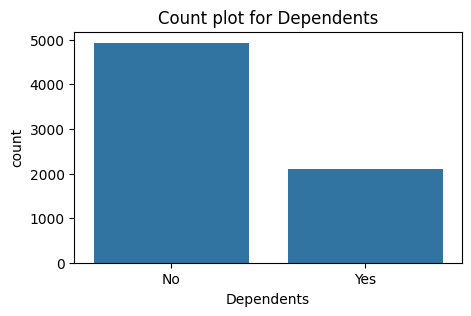

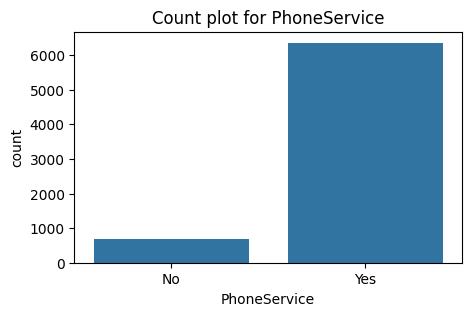

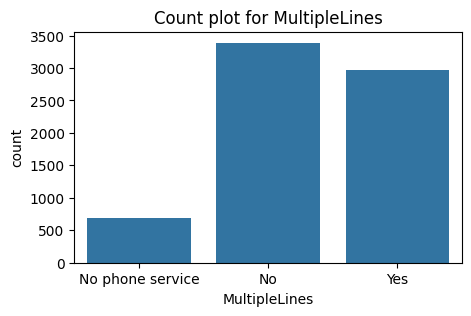

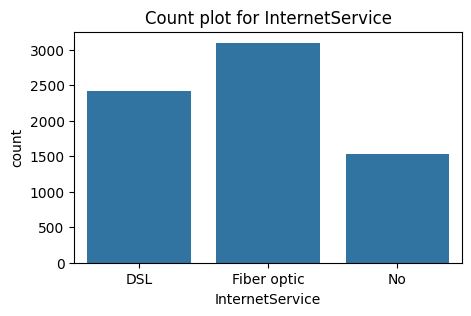

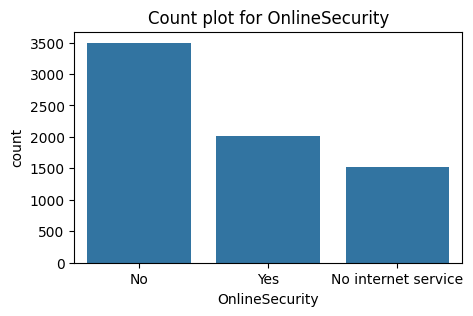

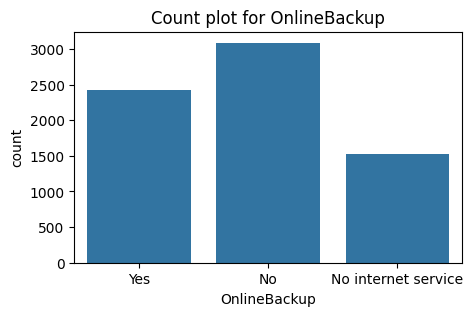

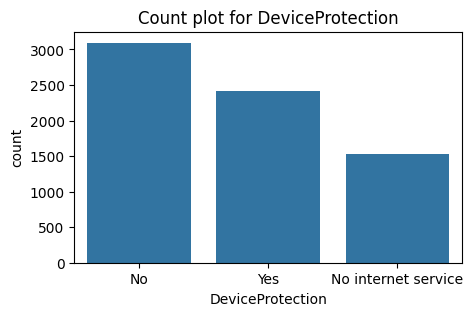

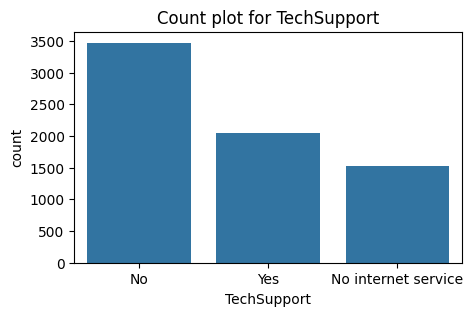

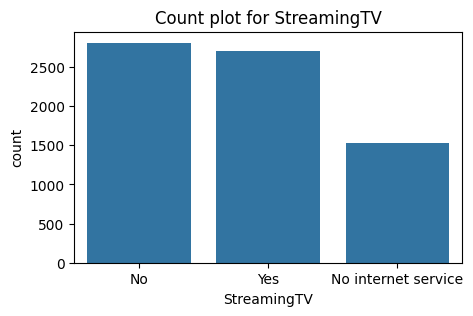

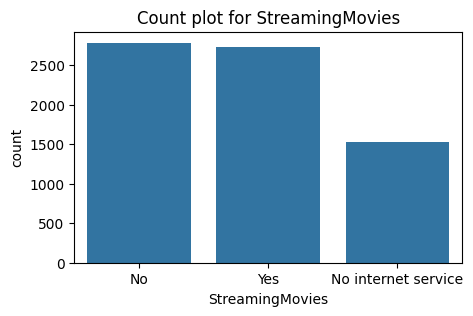

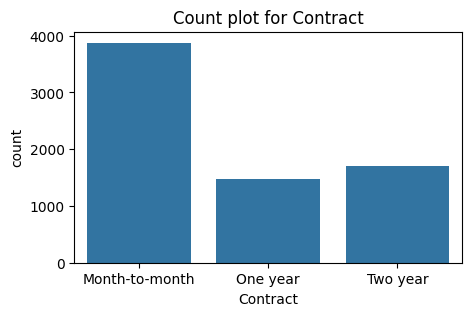

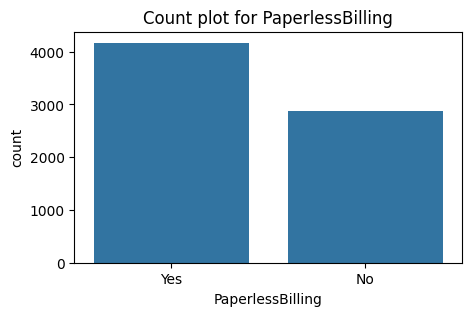

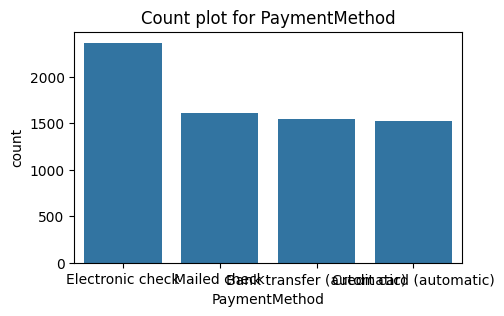

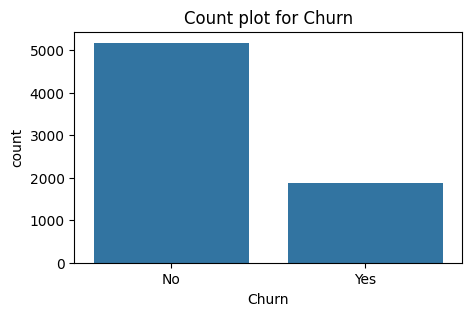

In [ ]:
for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(x=df[col])
  plt.title(f"Count plot for {col}")
  plt.show()

**4. Data Preprocessing**

Label encoding of target column

In [ ]:
df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})

/tmp/ipython-input-3368294369.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})


In [ ]:
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


**Label encoding of categorical features**

In [ ]:
#identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [ ]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
#initialize a dictionay to save the encoders
encoders = {} #Keeps each column’s encoder organized and retrievable by name

#apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder

#save the encoder to a pickle file
with open("encoders.pkl","wb") as f:
  pickle.dump(encoders, f)

#apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder

#save the encoder to a pickle file
with open("encoders.pkl","wb") as f: #Ensures you can reuse the exact encoders later (for predictions, deployment, etc.) for test
  pickle.dump(encoders, f)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


**Training and test data split**

In [ ]:
#splitting the features and target
X = df.drop(columns = ["Churn"])
y = df["Churn"]

In [ ]:
#split training and test data
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Synthetic Minority Oversampling technique(SMOTE)**

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [ ]:
print(y_train_smote.shape)

(8276,)


In [ ]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


**Model Training**

Training with default hyperparameters

In [ ]:
#dictionary of models
models = {
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Random Forest" : RandomForestClassifier(random_state=42),
    "XGBoost" : XGBClassifier(random_state=42)
}

In [ ]:
#dictionary to store the cross validation results
cv_scores = {}

#perform 5-fold cross validation for each model
for model_name,model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring="accuracy")
  cv_scores[model_name]=scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")


Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.78
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.84
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.83
